# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,194,195,196,197,198,199,200,y,site,date
0,0,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,0.999972,0.964124,0.860533,0.711037,0.543884,0.385132,0.252466,0.153209,0.086071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999889,0.966044,0.864036,0.715413,0.548366,0.389112,0.255604,0.155436,0.087503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999749,0.967914,0.867505,0.719775,0.552855,0.393111,0.258767,0.157686,0.088954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999555,0.969734,0.870939,0.724124,0.557350,0.397130,0.261955,0.159960,0.090424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [5]:
X = dat.iloc[:, 1:202].to_numpy()
y = dat['y'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [7]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [8]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [9]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               103424    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 5962

In [10]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [11]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 117ms/step - loss: 0.1054 - mae: 0.1054 - mse: 0.0309 - val_loss: 0.0874 - val_mae: 0.0874 - val_mse: 0.0089
Epoch 2/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0648 - mae: 0.0648 - mse: 0.0058 - val_loss: 0.0178 - val_mae: 0.0178 - val_mse: 4.7855e-04
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0330 - mae: 0.0330 - mse: 0.0018 - val_loss: 0.0320 - val_mae: 0.0320 - val_mse: 0.0013
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 0.0399 - mae: 0.0399 - mse: 0.0019 - val_loss: 0.0183 - val_mae: 0.0183 - val_mse: 4.9177e-04
Epoch 5/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0275 - mae: 0.0275 - mse: 0.0011 - val_loss: 0.0423 - val_mae: 0.0423 - val_mse: 0.0021
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0297 - mae: 0.0297 - mse: 0.0013 - val_loss: 0.0320 - val_mae: 0.0320 - val_mse: 0.0012
Epoch 7/50
2/2 [=========

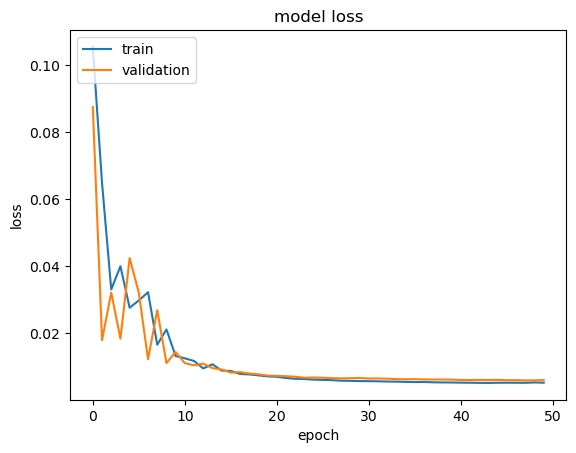

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

17/17 [==============================] - 0s 1ms/step


0.005582011703387851

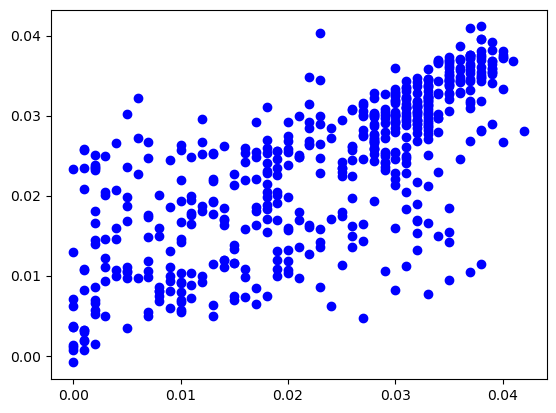

In [14]:
plt.plot(y_test, y_test_pred, 'bo')

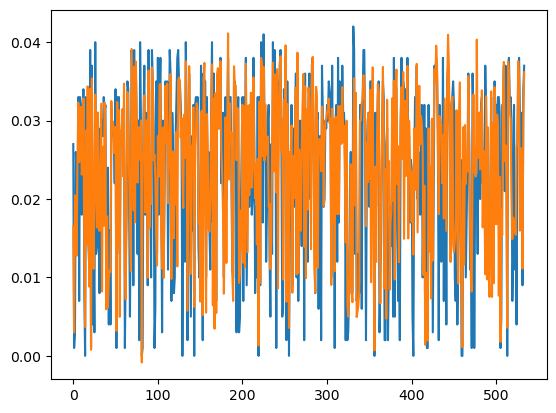

In [15]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

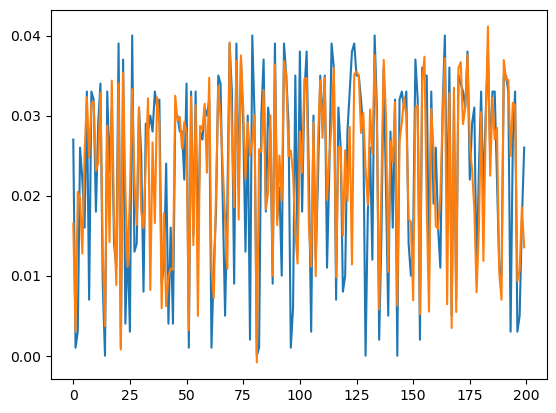

In [16]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

### Regularization with drop-outs

In [17]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               103424    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               6579

In [18]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [19]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 88ms/step - loss: 0.2127 - mae: 0.2127 - mse: 0.0787 - val_loss: 0.1354 - val_mae: 0.1354 - val_mse: 0.0189
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 0.1048 - mae: 0.1048 - mse: 0.0167 - val_loss: 0.0428 - val_mae: 0.0428 - val_mse: 0.0022
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0517 - mae: 0.0517 - mse: 0.0035 - val_loss: 0.0130 - val_mae: 0.0130 - val_mse: 2.6474e-04
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0238 - mae: 0.0238 - mse: 9.0606e-04 - val_loss: 0.0393 - val_mae: 0.0393 - val_mse: 0.0017
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 0.0262 - mae: 0.0262 - mse: 0.0011 - val_loss: 0.0096 - val_mae: 0.0096 - val_mse: 1.4165e-04
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0204 - mae: 0.0204 - mse: 6.4308e-04 - val_loss: 0.0129 - val_mae: 0.0129 - val_mse: 2.3121e-04
Epoch 7/50
2/2

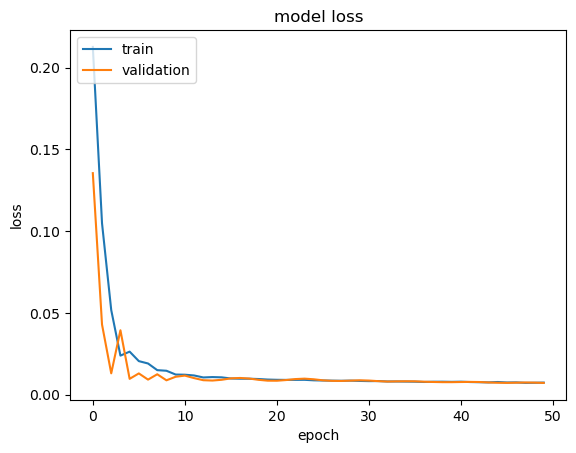

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

17/17 [==============================] - 0s 1ms/step


0.007109806824137181

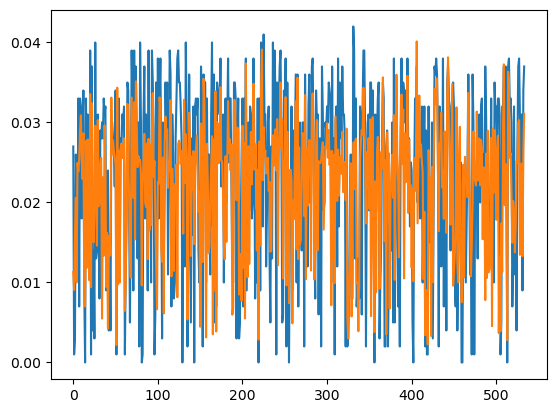

In [22]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

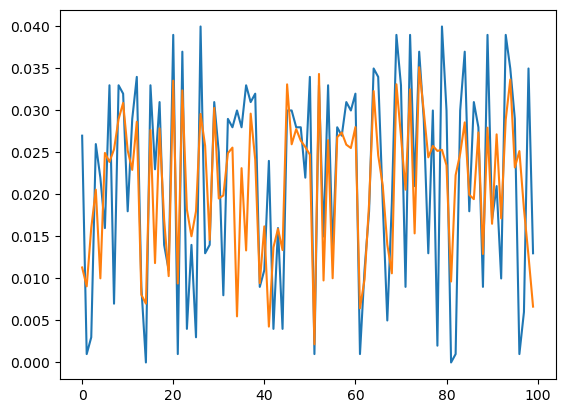

In [23]:
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.show()